<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/anpham1331/ECGR4105-Intro-to-ML/tree/main

#uses cancer.csv and Housing.csv for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


from google.colab import drive
drive.mount('/content/drive')

path_file1 = "/content/drive/MyDrive/ECGR 4105 - Intro to ML/Datasets/cancer.csv"
cancer = pd.read_csv(path_file1)

path_file2 = "/content/drive/MyDrive/ECGR 4105 - Intro to ML/Datasets/Housing.csv"
housing = pd.read_csv(path_file2)

# Defining the map function for cancer. Maps M to 1 and B to 0
varlist = ['diagnosis']
def binary_map(x):
    return x.map({'M': 1, 'B': 0})
# Applying the function to the cancer list
cancer[varlist] = cancer[varlist].apply(binary_map)

# Defining the map function for cancer. Maps yes to 1 and no to 0
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Best Number of PC: 15
Accuracy of Best PC: 0.9473684210526315
Precision of Best PC: 0.9019607843137255
Recall of Best PC: 0.9787234042553191
F1 of Best PC: 0.9387755102040817
K=1: Accuracy=0.8860, Precision=0.8400, Recall=0.8936
K=2: Accuracy=0.9123, Precision=0.8776, Recall=0.9149
K=3: Accuracy=0.9298, Precision=0.9149, Recall=0.9149
K=4: Accuracy=0.9211, Precision=0.8958, Recall=0.9149
K=5: Accuracy=0.9474, Precision=0.9767, Recall=0.8936
K=6: Accuracy=0.9211, Precision=0.9130, Recall=0.8936
K=7: Accuracy=0.9123, Precision=0.8776, Recall=0.9149
K=8: Accuracy=0.9386, Precision=0.9000, Recall=0.9574
K=9: Accuracy=0.9298, Precision=0.8824, Recall=0.9574
K=10: Accuracy=0.9386, Precision=0.8846, Recall=0.9787
K=11: Accuracy=0.9386, Precision=0.8846, Recall=0.9787
K=12: Accuracy=0.9386, Precision=0.8846, Recall=0.9787
K=13: Accuracy=0.9386, Precision=0.8846, Recall=0.9787
K=14: Accuracy=0.9386, Precision=0.8846, Recall=0.9787
K=15: Accuracy=0.9474, Precision=0.9020, Recall=0.9787
K=16: Acc

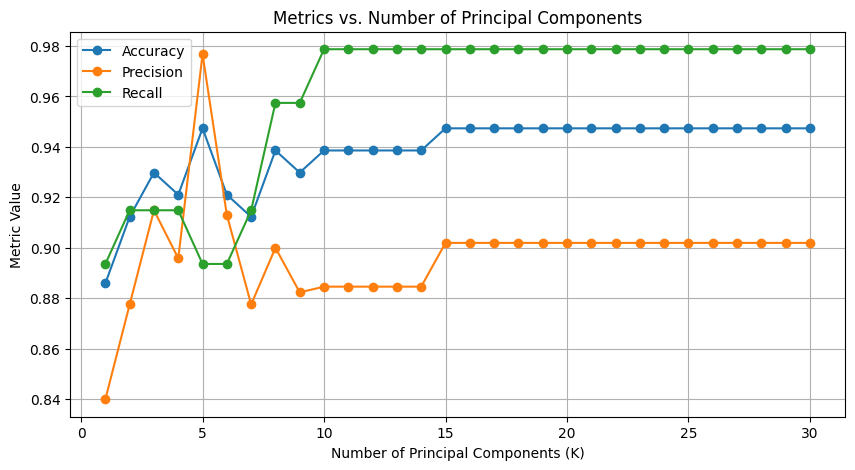

In [ ]:
#Problem 1 - rbf (radial)

#Get Values
X = cancer.iloc[:, 2:32].values
y = cancer.iloc[:, 1].values

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Scaling
sc = StandardScaler() # Create a scaler object
X_train = sc.fit_transform(X_train) # Fit the scaler to the training data and transform
X_test = sc.transform(X_test) # Apply the scaler to the test data

#Principal Components:15
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# "Linear Support vector classifier"
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1000)
model.fit(X_train_pca, Y_train)
Y_pred = model.predict(X_test_pca)

#Metrics
print("Best Number of PC: 15")
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy of Best PC:",accuracy)
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision of Best PC:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall of Best PC:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 of Best PC:",F1)



#Plot Multiple Metrics over multiple K
import matplotlib.pyplot as plt
# Define the range of K values
k_values = list(range(1,31))

# Initialize lists to store metrics for each K
accuracies = []
precisions = []
recalls = []

for k in k_values:
    # Fit the SVM model with K principal components and make predictions
    X_train_pca_k = X_train_pca[:, :k]
    model.fit(X_train_pca_k, Y_train)
    X_test_pca_k = X_test_pca[:, :k]
    Y_pred = model.predict(X_test_pca_k)

    # Calculate metrics for the current K
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)

    # Append the calculated metrics for the current K to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Print the metrics for the current K
    print(f"K={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")

# Plot the metrics for different K values
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Plot precision
plt.plot(k_values, precisions, marker='o', label='Precision')

# Plot recall
plt.plot(k_values, recalls, marker='o', label='Recall')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

Best Number of PC: 5
Accuracy of Best PC: 0.9736842105263158
Precision of Best PC: 0.9782608695652174
Recall of Best PC: 0.9574468085106383
F1 of Best PC: 0.967741935483871
K=1: Accuracy=0.8596, Precision=1.0000, Recall=0.6596
K=2: Accuracy=0.9386, Precision=0.9762, Recall=0.8723
K=3: Accuracy=0.9474, Precision=0.9556, Recall=0.9149
K=4: Accuracy=0.9211, Precision=0.8958, Recall=0.9149
K=5: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=6: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=7: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=8: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=9: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=10: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=11: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=12: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=13: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=14: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=15: Accuracy=0.9737, Precision=0.9783, Recall=0.9574
K=16: Accur

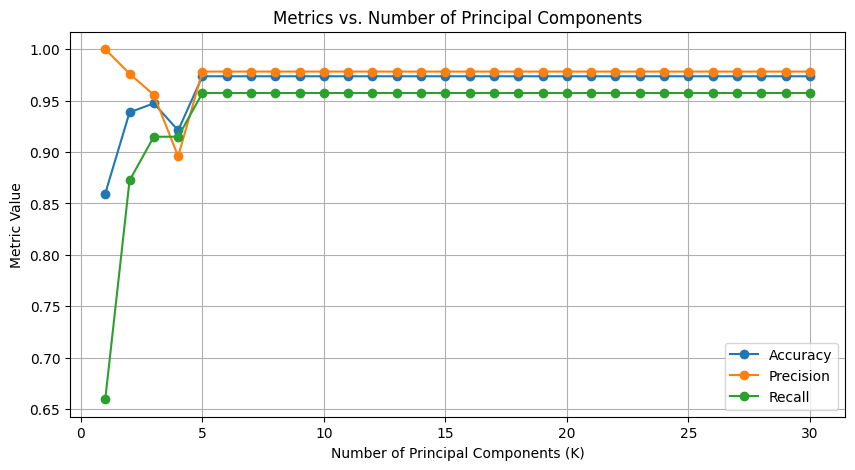

In [ ]:
#Problem 1 - polynomial

#Get Values
X = cancer.iloc[:, 2:32].values
y = cancer.iloc[:, 1].values

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Scaling
sc = StandardScaler() # Create a scaler object
X_train = sc.fit_transform(X_train) # Fit the scaler to the training data and transform
X_test = sc.transform(X_test) # Apply the scaler to the test data

#Principal Components:5
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# "Linear Support vector classifier"
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1000)
model.fit(X_train_pca, Y_train)
Y_pred = model.predict(X_test_pca)

#Metrics
print("Best Number of PC: 5")
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy of Best PC:",accuracy)
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision of Best PC:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall of Best PC:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 of Best PC:",F1)



#Plot Multiple Metrics over multiple K
import matplotlib.pyplot as plt
# Define the range of K values
k_values = list(range(1,31))

# Initialize lists to store metrics for each K
accuracies = []
precisions = []
recalls = []

for k in k_values:
    # Fit the SVM model with K principal components and make predictions
    X_train_pca_k = X_train_pca[:, :k]
    model.fit(X_train_pca_k, Y_train)
    X_test_pca_k = X_test_pca[:, :k]
    Y_pred = model.predict(X_test_pca_k)

    # Calculate metrics for the current K
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)

    # Append the calculated metrics for the current K to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Print the metrics for the current K
    print(f"K={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")

# Plot the metrics for different K values
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Plot precision
plt.plot(k_values, precisions, marker='o', label='Precision')

# Plot recall
plt.plot(k_values, recalls, marker='o', label='Recall')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

Best Number of PC: 9
Accuracy of Best PC: 0.9736842105263158
Precision of Best PC: 1.0
Recall of Best PC: 0.9361702127659575
F1 of Best PC: 0.967032967032967
K=1: Accuracy=0.9211, Precision=0.8958, Recall=0.9149
K=2: Accuracy=0.8684, Precision=0.8478, Recall=0.8298
K=3: Accuracy=0.8596, Precision=0.8163, Recall=0.8511
K=4: Accuracy=0.8947, Precision=0.8889, Recall=0.8511
K=5: Accuracy=0.9386, Precision=0.9545, Recall=0.8936
K=6: Accuracy=0.9386, Precision=0.9167, Recall=0.9362
K=7: Accuracy=0.9474, Precision=0.9767, Recall=0.8936
K=8: Accuracy=0.9474, Precision=0.9556, Recall=0.9149
K=9: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=10: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=11: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=12: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=13: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=14: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=15: Accuracy=0.9737, Precision=1.0000, Recall=0.9362
K=16: Accuracy=0.9737, Pre

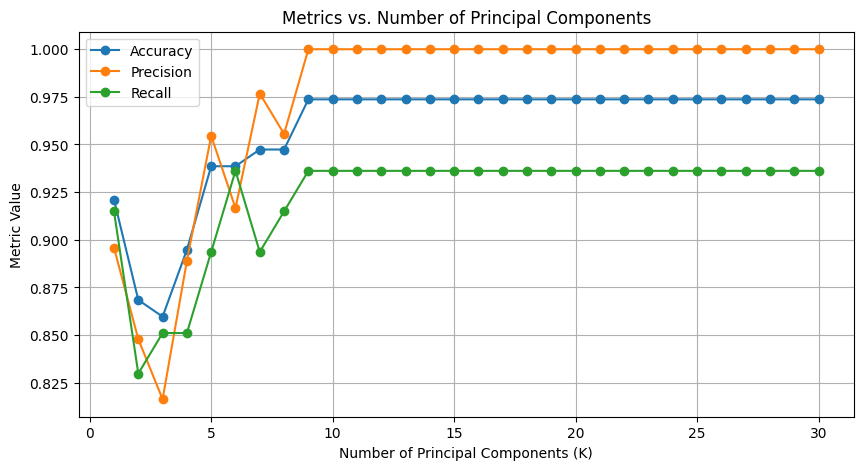

In [7]:
#Problem 1 - sigmoid

#Get Values
X = cancer.iloc[:, 2:32].values
y = cancer.iloc[:, 1].values

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Scaling
sc = StandardScaler() # Create a scaler object
X_train = sc.fit_transform(X_train) # Fit the scaler to the training data and transform
X_test = sc.transform(X_test) # Apply the scaler to the test data

#Principal Components:9
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# "Linear Support vector classifier"
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', C=1000)
model.fit(X_train_pca, Y_train)
Y_pred = model.predict(X_test_pca)

#Metrics
print("Best Number of PC: 9")
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy of Best PC:",accuracy)
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision of Best PC:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall of Best PC:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1 of Best PC:",F1)



#Plot Multiple Metrics over multiple K
import matplotlib.pyplot as plt
# Define the range of K values
k_values = list(range(1,31))

# Initialize lists to store metrics for each K
accuracies = []
precisions = []
recalls = []

for k in k_values:
    # Fit the SVM model with K principal components and make predictions
    X_train_pca_k = X_train_pca[:, :k]
    model.fit(X_train_pca_k, Y_train)
    X_test_pca_k = X_test_pca[:, :k]
    Y_pred = model.predict(X_test_pca_k)

    # Calculate metrics for the current K
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)

    # Append the calculated metrics for the current K to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Print the metrics for the current K
    print(f"K={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")

# Plot the metrics for different K values
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Plot precision
plt.plot(k_values, precisions, marker='o', label='Precision')

# Plot recall
plt.plot(k_values, recalls, marker='o', label='Recall')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

RBF Kernel:
Mean Squared Error (MSE): 2905529415300.253
R-squared (R2) Score: -0.0083328453342002

Linear Kernel:
Mean Squared Error (MSE): 976337851482.3292
R-squared (R2) Score: 0.6611724119506384

Polynomial Kernel:
Mean Squared Error (MSE): 1803241602927.8237
R-squared (R2) Score: 0.37420432684990745


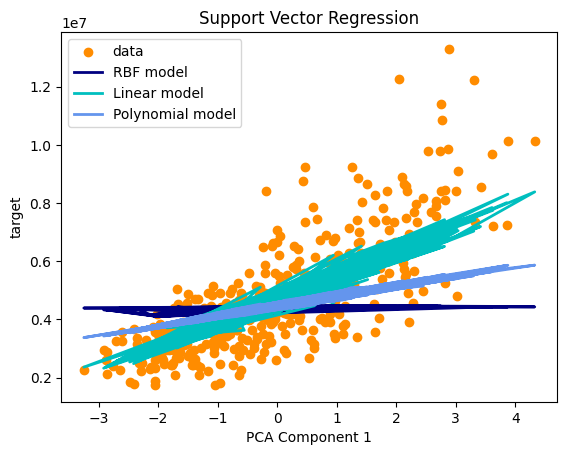

In [ ]:
# Problem 2

# Get Values
X = housing.iloc[:, 1:11].values
y = housing.iloc[:, 0].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling
sc = StandardScaler()  # Create a scaler object
X_train = sc.fit_transform(X_train)  # Fit the scaler to the training data and transform
X_test = sc.transform(X_test)  # Apply the scaler to the test data

# Principal Components: 10
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Use the desired number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=10000, gamma=0.8)
svr_lin = SVR(kernel='linear', C=10000)
svr_poly = SVR(kernel='poly', C=10000, degree=1)
y_rbf = svr_rbf.fit(X_train_pca, y_train).predict(X_train_pca)
y_lin = svr_lin.fit(X_train_pca, y_train).predict(X_train_pca)
y_poly = svr_poly.fit(X_train_pca, y_train).predict(X_train_pca)

# Calculate metrics on the test set
y_rbf_test = svr_rbf.predict(X_test_pca)
y_lin_test = svr_lin.predict(X_test_pca)
y_poly_test = svr_poly.predict(X_test_pca)
mse_rbf = mean_squared_error(y_test, y_rbf_test)
mse_lin = mean_squared_error(y_test, y_lin_test)
mse_poly = mean_squared_error(y_test, y_poly_test)
r2_rbf = r2_score(y_test, y_rbf_test)
r2_lin = r2_score(y_test, y_lin_test)
r2_poly = r2_score(y_test, y_poly_test)
print("RBF Kernel:")
print("Mean Squared Error (MSE):", mse_rbf)
print("R-squared (R2) Score:", r2_rbf)
print()
print("Linear Kernel:")
print("Mean Squared Error (MSE):", mse_lin)
print("R-squared (R2) Score:", r2_lin)
print()
print("Polynomial Kernel:")
print("Mean Squared Error (MSE):", mse_poly)
print("R-squared (R2) Score:", r2_poly)

# Visualize the results
lw = 2
plt.scatter(X_train_pca[:, 0], y_train, color='darkorange', label='data')
plt.plot(X_train_pca[:, 0], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_train_pca[:, 0], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_train_pca[:, 0], y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('PCA Component 1')  # Update the label
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

